In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import sys
sys.path.append('../www')

In [2]:
import requests
import pandas as pd
import ast
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Garrett/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


##  Import data_exploration2.py
    1. Connect to UCSD VPN via UCSD Protected, https://vpn.ucsd.edu/+CSCOE+/logon.html, or AnyConnect.
    2. Import data_exploration2.py into notebook
    3. When prompted conda/pip install packages as needed
    4. Test functionality with the code below

In [10]:
from data_exploration2 import *

# Current API Methods

## 1. Correlation coefficient between 2 columns in a table.

In [11]:
col1 = 'numunits'
col2 = 'productid'
table1 = 'orderlines'
table2 = 'products'
key1 = 'productid'
key2 = 'productid'


col_pair = (col1,col2)
table_pair = (table1,table2)
key_pair = (key1,key2)

response=Stats('CORR',col_pair, table_pair, key_pair)

print("Correlation: ",response)

('Correlation: ', 0.00643616130791823)


## 2. Covariance coefficient between 2 columns in a table.

In [12]:
col1 = 'numunits'
col2 = 'productid'
table1 = 'orderlines'
table2 = 'products'
key1 = 'productid'
key2 = 'productid'

col_pair = (col1,col2)
table_pair = (table1,table2)
key_pair = (key1,key2)

response=Stats('covar_samp',col_pair, table_pair, key_pair)

print("Covariance: ",response)

('Covariance: ', 93.5788384664056)


## 3. Simple aggregates  between 2 columns in a table.

In [13]:
# select count(a.numorderlines), max(b.totalprice)
# from orders a, orderlines b
# where a.orderid = b.orderid
# group by a.numorderlines

response = Simpleagg(agg_func_pair=['COUNT','MAX'], col_pair=['numorderlines','numunits'],table_pair=['orders','orderlines'],
                 key_pair=['orderid','orderid'])

pd.DataFrame.from_records(response, columns=['Count','Max']).head(10)

,Count,Max
0,34,1
1,32,1
2,50,4
3,2128,55
4,612,15
5,116,9
6,139561,3000
7,1100,22
8,26,1
9,781,12


## 3. Simple Histogram

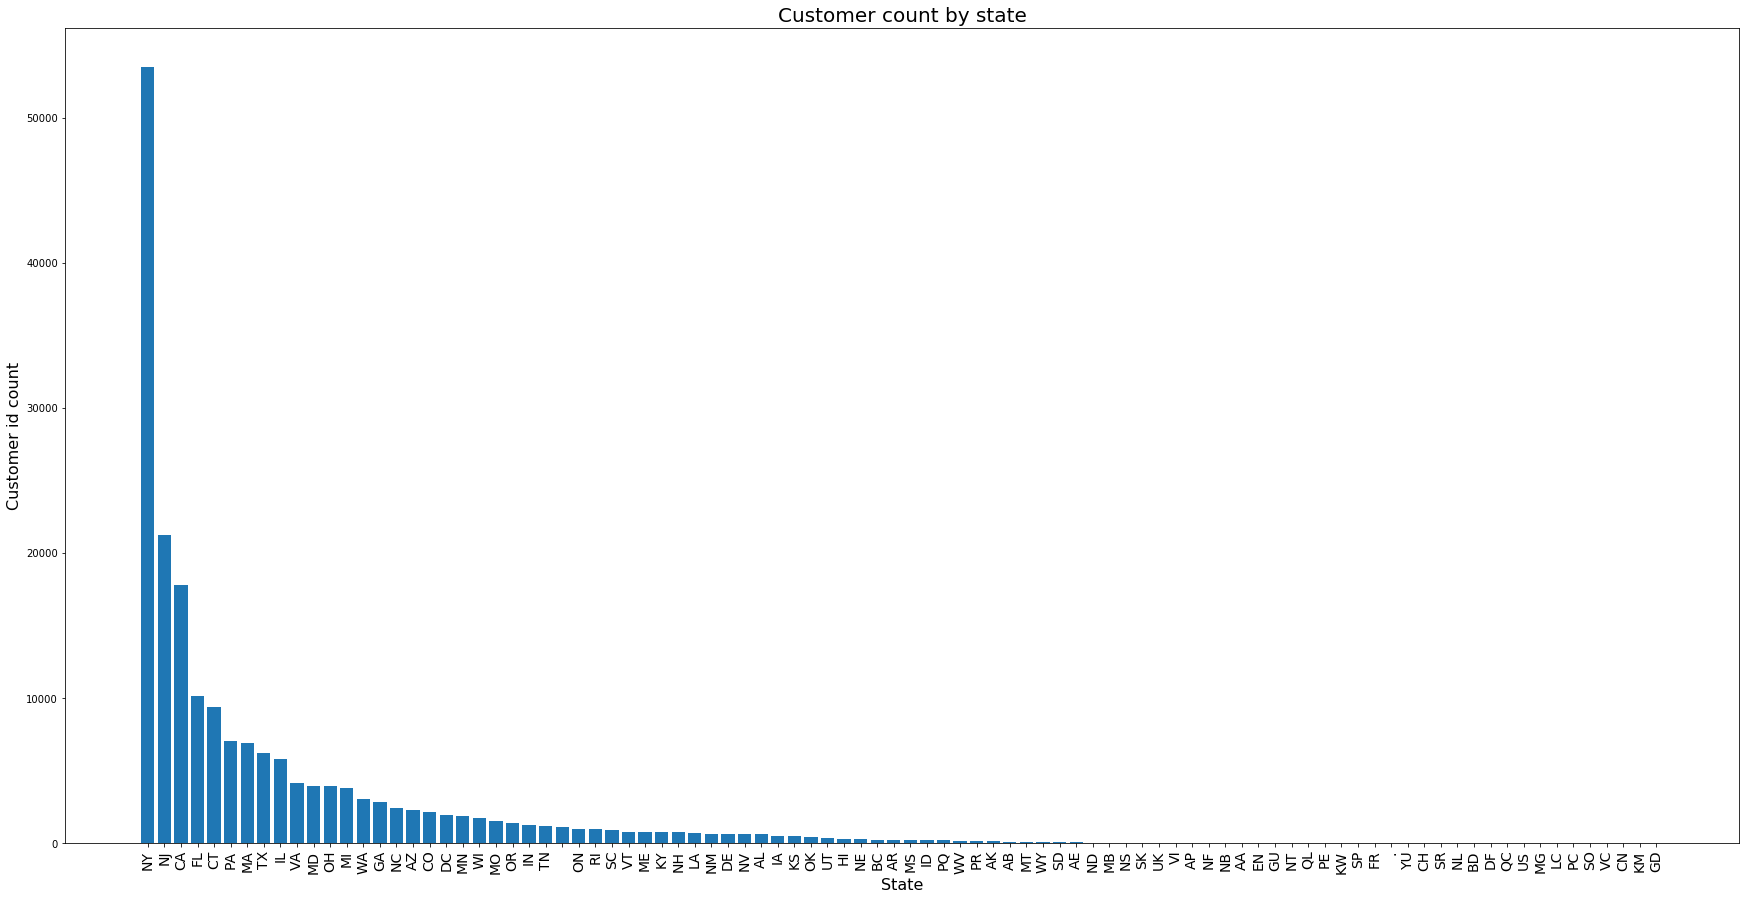

In [15]:
table = "orders"
groupby = 'state'
count = 'customerid'
response = Histogram(table, groupby, count)
# data = ast.literal_eval(response)
df = pd.DataFrame(response)
x = np.array(range(len(df['Group'])))
y = np.array(df['Count'])
my_xticks = df['Group'].values
plt.figure(figsize=[30,15])
plt.xticks(x, my_xticks, fontsize=14, rotation='vertical')
plt.bar(x, y)
plt.title('Customer count by state', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Customer id count', fontsize=16);


## 4. What are the top categories of books read in a particular month(s)?
    Sample Query: What are the top 3 categories of books that are most read around Christmas?
    
    @app.route("/api/Top_Categories/<num_categories>/<month>")

In [16]:
num_categories = 5
months = [12]
tc = OptimizedTopCategories(num_categories, months)
print(tc)

[('Education & Reference', 9689.0), ('Graphics & Design', 4070.0), ('Geography & Cultures', 3763.0), ('Programming', 3699.0), ('Science, Nature & How It Works', 2997.0)]


## 5. Generalized Query: What time of the year are the sales of  X category/ies of book the highest?
    Sample Query: What time of the year are the sales of “Education” books the highest?

    

In [18]:
list='Education & Reference,Drawing,Architecture'
category_list = list.split(",")

print("\nHighest Monthly Sales By Category: \n")

#hmsb = HighestMonthlySalesByCategory('Education & Reference')
limit = 5
hmsb = HighestMonthlySalesByCategory(category_list, 5)
print(hmsb)



Highest Monthly Sales By Category: 

[{'mon': 12, 'num_sold': 12356}, {'mon': 11, 'num_sold': 7839}, {'mon': 1, 'num_sold': 5572}, {'mon': 5, 'num_sold': 4413}, {'mon': 6, 'num_sold': 4143}]


## 6. Sentiment polarity score for all reviews extracted for Solr datasource
    @app.route('/sentiment_polarity/<category>/<month>', methods=['GET'])

In [100]:
print("Sentiment Polarity: \n")
sr = Sales_Reviews('Education', 3) 
print (sr)

Sentiment Polarity: 

[]


## 7. Which book categories show a downward trend in demand in a particular month?
    Sample Query: Which book categories show a downward trend in demand in Winter and Spring?
    
    @app.route("/api/Downward_Sales/<season>")

In [162]:
j = Downward_Sales('spring')
df = pd.DataFrame(j)
df.set_index('category', inplace=True)
df.head(10)

,SaleTrend
category,
2963,-364
8944264011,-257
8951153011,-153
8944258011,-130
1007,-116
3564986011,-86
3094,-78
2990,-74
8883833011,-70


## 8. Is there a category which performs poorly in a date range?
    Sample Query: Is there a category that we should discontinue stocking?

    @app.route("/api/Discontinue_Stocking/<threshold>/<startyear>/<endyear>")

In [166]:
thresh=5
st_year=2013
end_year=2014
j = Discontinue_Stocking(thresh,st_year,end_year)
df = pd.DataFrame(j)
df.head(10)

,category
0,10020677011
1,10020679011
2,10020695011
3,10020696011
4,10020700011
5,10020701011
6,10020702011
7,10020703011
8,10020704011
9,10020709011


## Get the node IDs from a specific category


In [167]:
getNodeIds(["Women's Fiction",'Education & Reference'])

[{u'nodeID': 2732},
 {u'nodeID': 11661},
 {u'nodeID': 2737},
 {u'nodeID': 11686},
 {u'nodeID': 10020691011},
 {u'nodeID': 3176},
 {u'nodeID': 3564978011},
 {u'nodeID': 8944243011},
 {u'nodeID': 8944244011},
 {u'nodeID': 3351944011},
 {u'nodeID': 69802},
 {u'nodeID': 69803},
 {u'nodeID': 69804},
 {u'nodeID': 15356861},
 {u'nodeID': 69805},
 {u'nodeID': 69806},
 {u'nodeID': 69807},
 {u'nodeID': 69808},
 {u'nodeID': 69809},
 {u'nodeID': 69810},
 {u'nodeID': 3190},
 {u'nodeID': 2917},
 {u'nodeID': 2918},
 {u'nodeID': 15356871},
 {u'nodeID': 2919},
 {u'nodeID': 2920},
 {u'nodeID': 69281},
 {u'nodeID': 2922},
 {u'nodeID': 2923},
 {u'nodeID': 2924},
 {u'nodeID': 2925},
 {u'nodeID': 2939},
 {u'nodeID': 2940},
 {u'nodeID': 2941},
 {u'nodeID': 2942},
 {u'nodeID': 2943},
 {u'nodeID': 2944},
 {u'nodeID': 2945},
 {u'nodeID': 2946},
 {u'nodeID': 2947},
 {u'nodeID': 2948},
 {u'nodeID': 2949},
 {u'nodeID': 8951191011},
 {u'nodeID': 2950},
 {u'nodeID': 2955},
 {u'nodeID': 2963},
 {u'nodeID': 2965},
 {u

## Get all the Categories 

In [131]:
getCategories()

[{u'category': u'Abuse'},
 {u'category': u'Accounting'},
 {u'category': u'Action & Adventure'},
 {u'category': u'Action & Adventure Manga'},
 {u'category': u'Activities, Crafts & Games'},
 {u'category': u'Addiction & Recovery'},
 {u'category': u'Administration & Medicine Economics'},
 {u'category': u'Administrative Law'},
 {u'category': u'Adoption'},
 {u'category': u'Adventure Travel'},
 {u'category': u'Africa'},
 {u'category': u'African American'},
 {u'category': u'Aging'},
 {u'category': u'Aging Parents'},
 {u'category': u'Agnosticism'},
 {u'category': u'Agricultural Sciences'},
 {u'category': u'Allied Health Professions'},
 {u'category': u'Almanacs & Yearbooks'},
 {u'category': u'Alternative Medicine'},
 {u'category': u'Americas'},
 {u'category': u'Ancient & Medieval Literature'},
 {u'category': u'Ancient Civilizations'},
 {u'category': u'Anger Management'},
 {u'category': u'Animals'},
 {u'category': u'Anthologies'},
 {u'category': u'Anthropology'},
 {u'category': u'Antiques & Colle

## Get the n top categories

In [132]:
n=10
getTopCategories(n)

[{'category': 'Education & Reference'},
 {'category': 'Geography & Cultures'},
 {'category': 'Programming'},
 {'category': 'Science, Nature & How It Works'},
 {'category': 'Graphics & Design'},
 {'category': 'Animals'},
 {'category': 'Early Learning'},
 {'category': 'Engineering'},
 {'category': 'Home Improvement & Design'},
 {'category': 'Growing Up & Facts of Life'}]